# Binary Classification_ Logistic Regression_ on Sonar Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
sonar=pd.read_csv('sonar.csv')
print(sonar)

     Unnamed: 0      V1      V2      V3      V4      V5      V6      V7  \
0             1  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539   
1             2  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156   
2             3  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431   
3             4  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098   
4             5  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209   
..          ...     ...     ...     ...     ...     ...     ...     ...   
203         204  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028   
204         205  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990   
205         206  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257   
206         207  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465   
207         208  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655   

         V8      V9  ...     V52     V53     V54     V55     V56     V57  \
0    0.1601  0.3109  ..

In [3]:
sonar.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar.shape

(208, 62)

In [5]:
# get some statistics
sonar.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,104.500000,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,60.188592,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,1.000000,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,52.750000,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,104.500000,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,156.250000,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,208.000000,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
             ..
V57           0
V58           0
V59           0
V60           0
Class         0
Length: 62, dtype: int64

In [7]:
sonar.dtypes

Unnamed: 0      int64
V1            float64
V2            float64
V3            float64
V4            float64
               ...   
V57           float64
V58           float64
V59           float64
V60           float64
Class          object
Length: 62, dtype: object

In [8]:
sonar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,208.0,104.500000,60.188592,1.0000,52.750000,104.50000,156.250000,208.0000
V1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
V2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
V3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
V4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
...,...,...,...,...,...,...,...,...
V56,208.0,0.008222,0.005736,0.0004,0.004400,0.00685,0.010575,0.0394
V57,208.0,0.007820,0.005785,0.0003,0.003700,0.00595,0.010425,0.0355
V58,208.0,0.007949,0.006470,0.0003,0.003600,0.00580,0.010350,0.0440
V59,208.0,0.007941,0.006181,0.0001,0.003675,0.00640,0.010325,0.0364


In [9]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  208 non-null    int64  
 1   V1          208 non-null    float64
 2   V2          208 non-null    float64
 3   V3          208 non-null    float64
 4   V4          208 non-null    float64
 5   V5          208 non-null    float64
 6   V6          208 non-null    float64
 7   V7          208 non-null    float64
 8   V8          208 non-null    float64
 9   V9          208 non-null    float64
 10  V10         208 non-null    float64
 11  V11         208 non-null    float64
 12  V12         208 non-null    float64
 13  V13         208 non-null    float64
 14  V14         208 non-null    float64
 15  V15         208 non-null    float64
 16  V16         208 non-null    float64
 17  V17         208 non-null    float64
 18  V18         208 non-null    float64
 19  V19         208 non-null    f

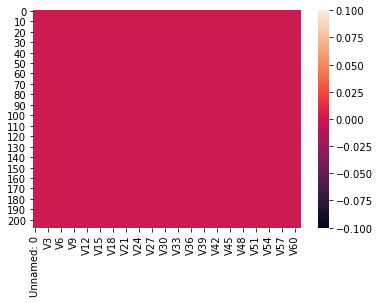

In [10]:
sns.heatmap(sonar.isnull())
plt.show()

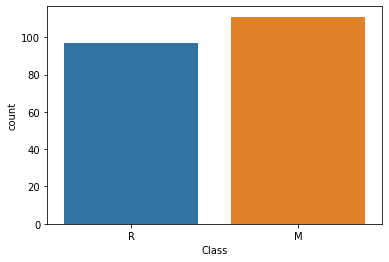

In [11]:
sns.countplot(sonar['Class'])

# Exploratry Data Analysis

<Figure size 1440x720 with 0 Axes>

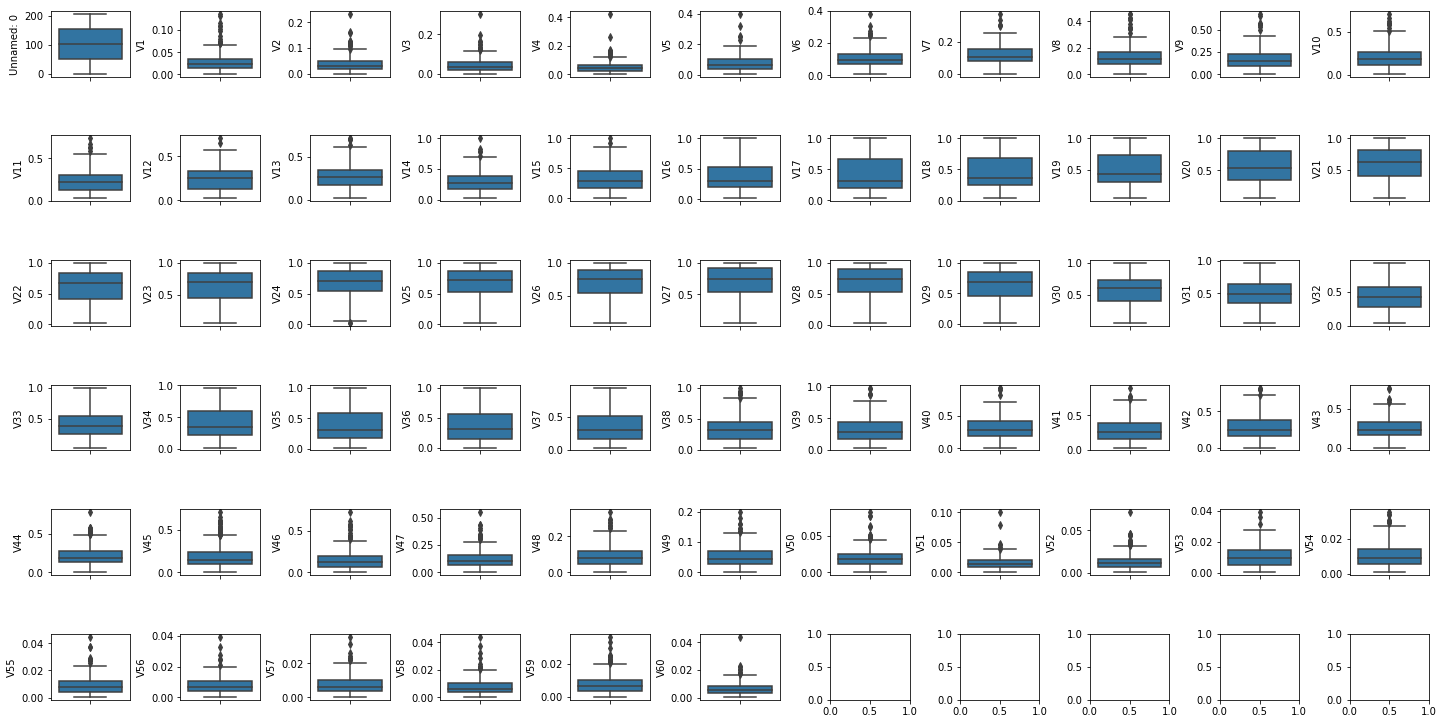

In [12]:
# Create Boxplots
plt.figure(figsize=(20,10))
fig, ax=plt.subplots(ncols=11,nrows=6, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in sonar.items():
    if col!='Class':
        sns.boxplot(y=col, data=sonar, ax=ax[index])
        index+=1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


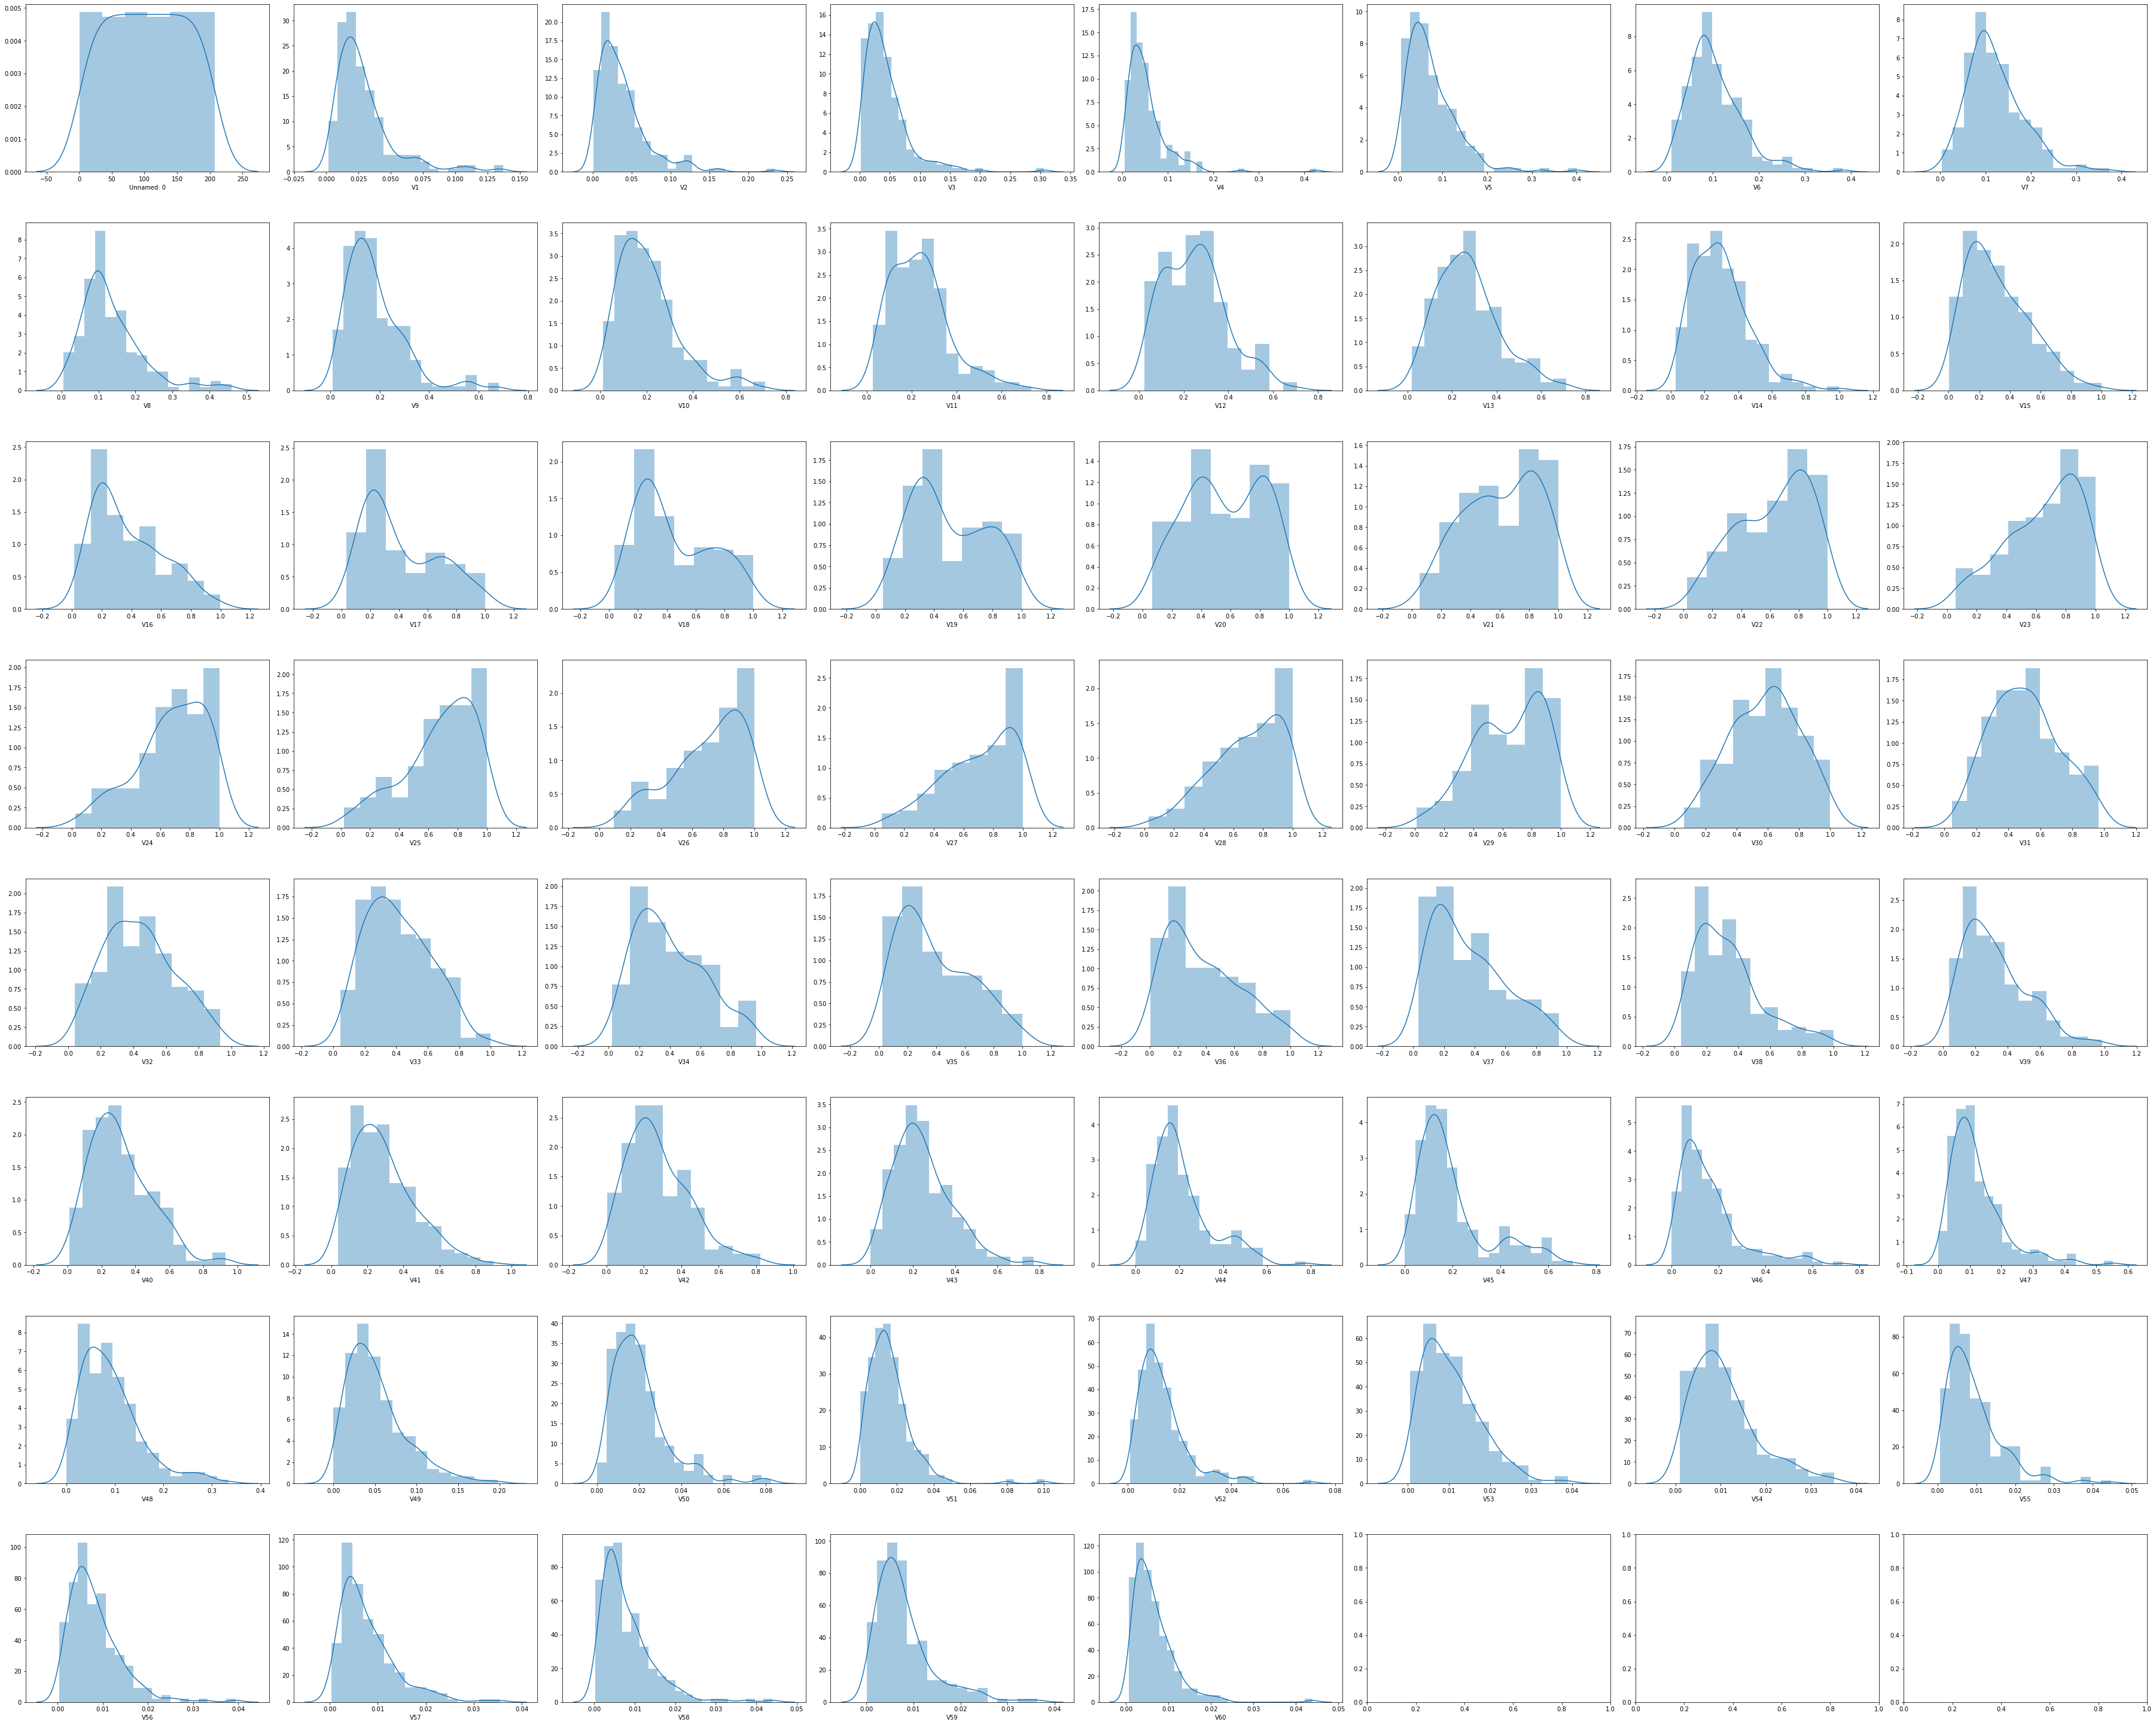

In [13]:
# Create distplot
fig, ax=plt.subplots(ncols=8,nrows=8, figsize=(50,40))
index=0
ax=ax.flatten()

for col, value in sonar.items():
    if col!='Class':
        sns.distplot(value, ax=ax[index])
        index+=1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Correlation Matrix

In [14]:
corr=sonar.corr()
corr

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
Unnamed: 0,1.000000,0.121876,0.080033,0.021281,0.040527,0.038492,0.050444,0.063006,0.138952,0.286629,...,0.194542,0.150841,-0.049756,-0.004333,-0.072233,-0.056178,-0.161624,-0.016085,-0.049046,-0.058183
V1,0.121876,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
V2,0.080033,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
V3,0.021281,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
V4,0.040527,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V56,-0.056178,0.220642,0.262263,0.287661,0.280938,0.199323,0.166758,0.174143,0.276819,0.232764,...,0.209752,0.203121,0.421588,0.397378,0.429948,1.000000,0.515154,0.463659,0.430804,0.349449
V57,-0.161624,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,...,0.191407,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219
V58,-0.016085,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,...,0.325665,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827
V59,-0.049046,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,...,0.317942,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872


In [15]:
# convert 'Class' column to 'category' data type
X = sonar.drop('Class', 1)
sonar['Class'] = sonar['Class'].astype('category')
y = sonar['Class']

In [16]:
# split data into train / test data sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [17]:
# fit the logistic regression model
lm = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [18]:
# evaluate the model on test data set
y_pred = lm.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[25  0]
 [ 6 11]]


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


# Naive bayes model

In [20]:
# run the naive bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [21]:
nb.score(X_test, y_test)

0.9523809523809523

In [22]:
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[23  2]
 [ 0 17]]


# Support vector machine model

In [23]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [24]:
svc.score(X_test, y_test)

1.0

In [25]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[25  0]
 [ 0 17]]


# Random forest model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
rf.score(X_test, y_test)

1.0

In [28]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[25  0]
 [ 0 17]]


# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
dt.score(X_test, y_test)

1.0

In [31]:
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[25  0]
 [ 0 17]]


# Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
gbc.score(X_test, y_test)

1.0

In [34]:
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[25  0]
 [ 0 17]]


# KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
knn.score(X_test, y_test)

1.0

In [37]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[25  0]
 [ 0 17]]


# Conclusion
On the basis of Accuracy Score The Best Model is done by Logistic Regression having accuracy score of "%age".

Let's save Logistic Regression